In [4]:
# Ecualizacion de un histograma
# Vamos a poner limeal al histograma inicial
# Siginifica tener una imagen uniforme 
# El histograma no debe trabajar monocormo creciente y no debe superar el valor de 0
# Deber tenen inversa y debe ser monotomicamente creciente

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

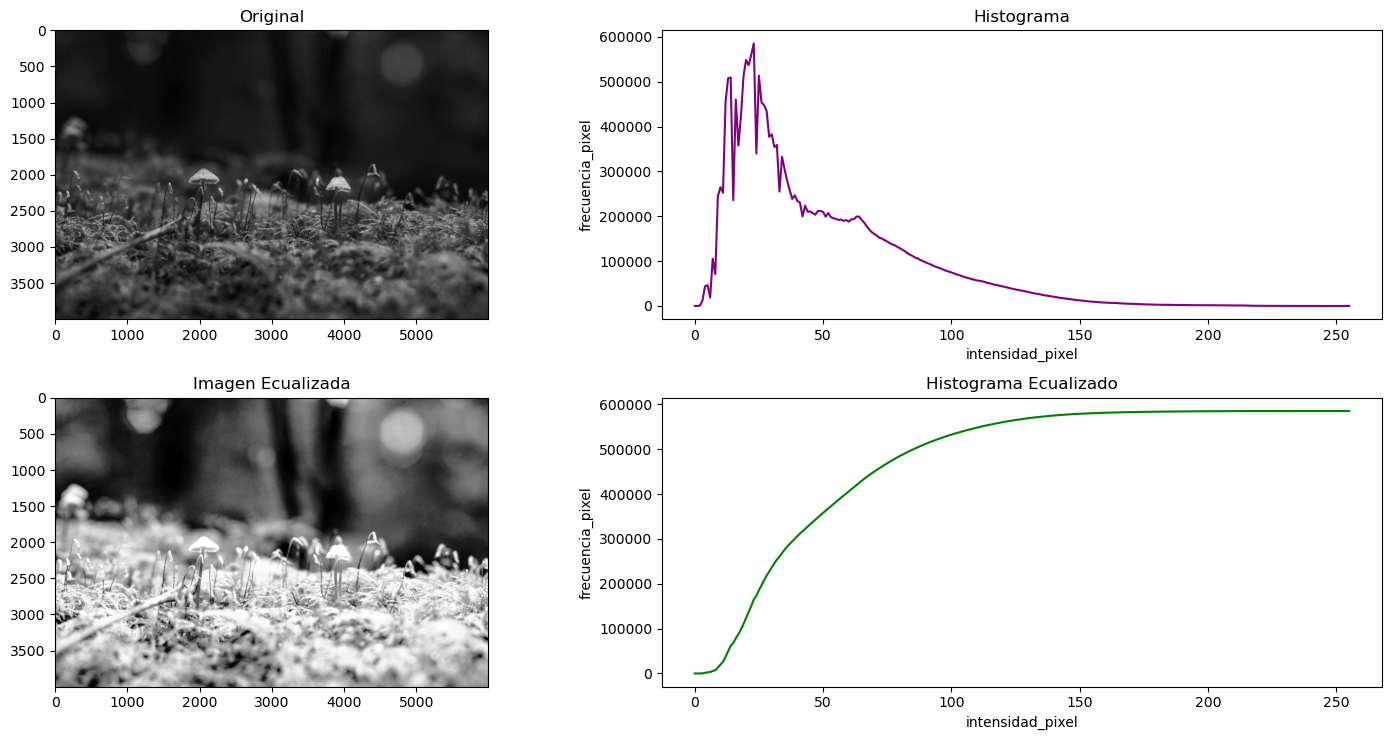

In [31]:
img = cv.imread('..//img/naturaleza.jpg', cv.IMREAD_GRAYSCALE)

histograma = np.histogram(img, 256, [0, 256])
fun_dist = histograma[0].cumsum()
his_norm = fun_dist * histograma[0].max() / fun_dist.max() # Result of the integral function
img_ecualizada = cv.equalizeHist(img)

# Plotting
plt.figure(figsize=(15, 7.5))

# Original Image
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

# Histogram
plt.subplot(2, 2, 2)
plt.plot(histograma[0], color='purple')
plt.title('Histograma')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

# Equalized Image
plt.subplot(2, 2, 3)
plt.title('Imagen Ecualizada')
plt.imshow(img_ecualizada, cmap='gray')

# Equalized Histogram
# histograma_ecualizado = np.histogram(img_ecualizada, 256, [0, 256])
plt.subplot(2, 2, 4)
plt.plot(his_norm, color='green')
plt.title('Histograma Ecualizado')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

plt.tight_layout()
plt.show()

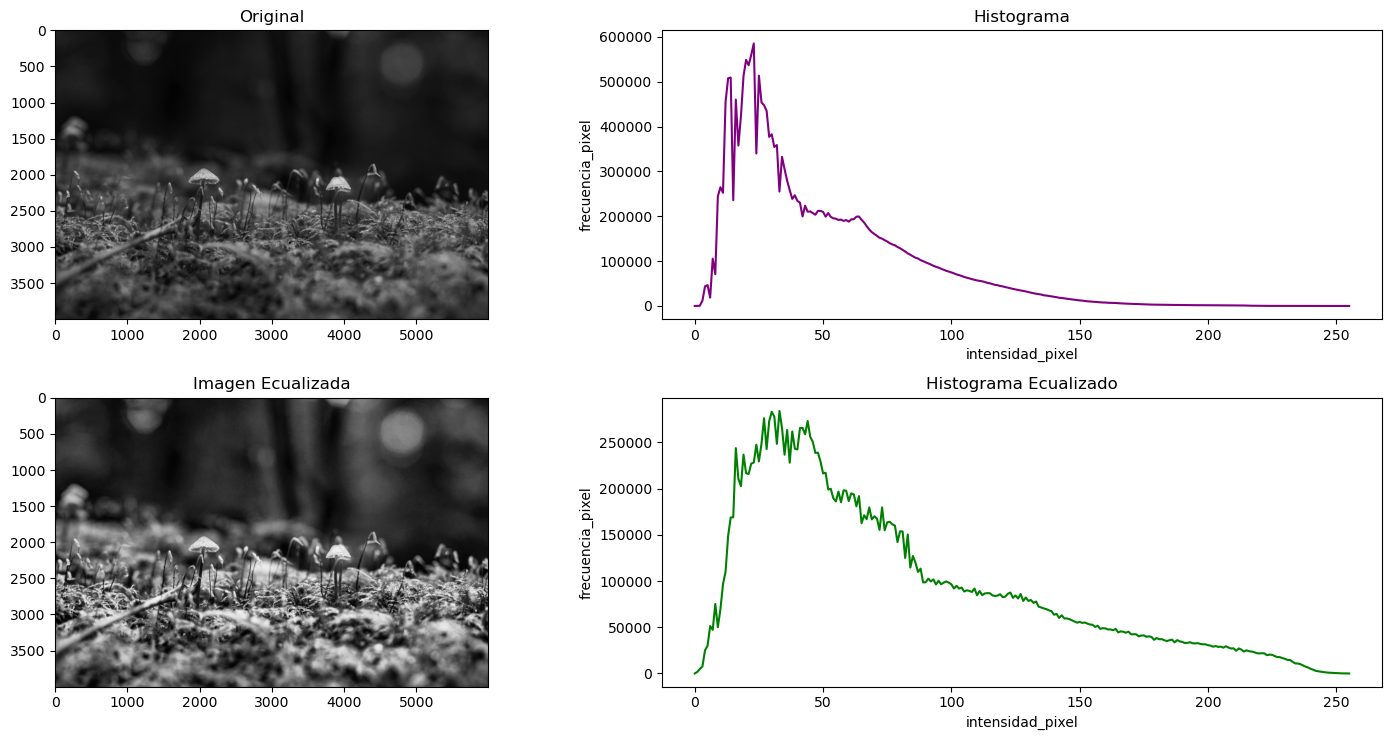

In [35]:
img = cv.imread('..//img/naturaleza.jpg', cv.IMREAD_GRAYSCALE)
clahe =  cv.createCLAHE(clipLimit= 2.0, tileGridSize= (8, 8))
img_nueva = clahe.apply(img)


histograma = np.histogram(img, 256, [0, 256])
histograma_nuevo = np.histogram(img_nueva, 256, [0, 256])

# Plotting
plt.figure(figsize=(15, 7.5))

# Original Image
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

# Histogram
plt.subplot(2, 2, 2)
plt.plot(histograma[0], color='purple')
plt.title('Histograma')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

# Equalized Image
plt.subplot(2, 2, 3)
plt.title('Imagen Ecualizada')
plt.imshow(img_nueva, cmap='gray')

# Equalized Histogram
plt.subplot(2, 2, 4)
plt.plot(histograma_nuevo[0], color='green')
plt.title('Histograma Ecualizado')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

plt.tight_layout()
plt.show()

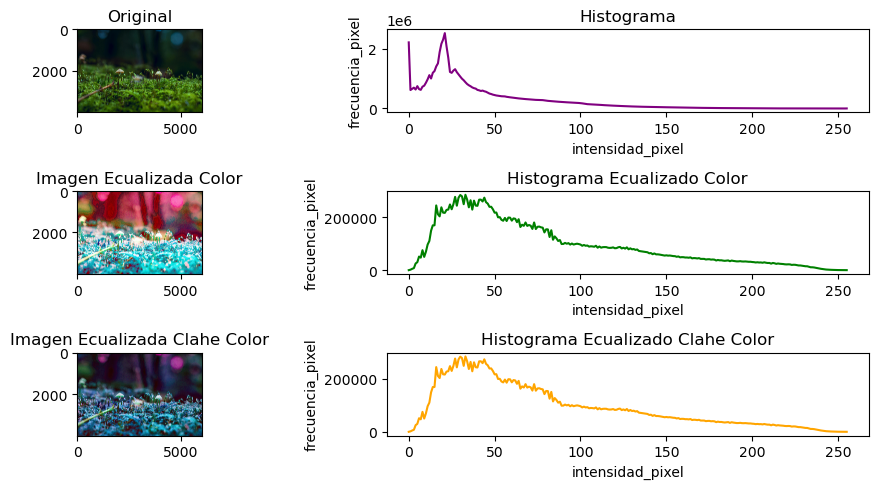

In [56]:
img = cv.imread('..//img/naturaleza.jpg', 1)
clahe =  cv.createCLAHE(clipLimit= 2.0, tileGridSize= (8, 8))



histograma = np.histogram(img, 256, [0, 256])




red, green, blue = cv.split(img)
# Clahe 
contraste_blue = clahe.apply(red)
contraste_red =  clahe.apply(green)
contraste_green = clahe.apply(blue)
finImgClahe = cv.merge((contraste_red, contraste_green, contraste_blue))
histograma_clahe = np.histogram(finImgClahe, 256, [0, 256])

# Ecualizador
contraste_blue = cv.equalizeHist(red)
contraste_red =  cv.equalizeHist(green)
contraste_green = cv.equalizeHist(blue)
finImgEcua = cv.merge((contraste_red, contraste_green, contraste_blue))
histograma_ecua = np.histogram(finImgEcua, 256, [0, 256])

plt.figure(figsize=(10, 5))
# Original Image
plt.subplot(3, 2, 1)
plt.title('Original')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Histogram
plt.subplot(3, 2, 2)
plt.plot(histograma[0], color='purple')
plt.title('Histograma')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

# Equalized Image
plt.subplot(3, 2, 3)
plt.title('Imagen Ecualizada Color')
plt.imshow(cv.cvtColor(finImgEcua, cv.COLOR_BGR2RGB))

# Equalized Histogram
plt.subplot(3, 2, 4)
plt.plot(histograma_ecua[0], color='green')
plt.title('Histograma Ecualizado Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

# Equalized Image
plt.subplot(3, 2, 5)
plt.title('Imagen Ecualizada Clahe Color')
plt.imshow(cv.cvtColor(finImgClahe, cv.COLOR_BGR2RGB))

# Equalized Histogram
plt.subplot(3, 2, 6)
plt.plot(histograma_clahe[0], color='orange')
plt.title('Histograma Ecualizado Clahe Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

plt.tight_layout()
plt.show()